<a href="https://colab.research.google.com/github/reja360/Wind-Rose/blob/main/ann_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
##Current wind speed is predicted with the previous one hour's data given as input

import pandas as pd
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [26]:
data = pd.read_csv('/content/time.csv',encoding= 'unicode_escape')

In [27]:
data.head()

,Wind Speed (m/s),LV ActivePower (kW),Wind Direction (°),Theoretical_Power_Curve (KWh)
0,5.311336,380.047791,259.994904,416.328908
1,5.672167,453.769196,268.641113,519.917511
2,5.216037,306.376587,272.564789,390.900016
3,5.659674,419.645904,271.258087,516.127569
4,5.577941,380.650696,265.674286,491.702972


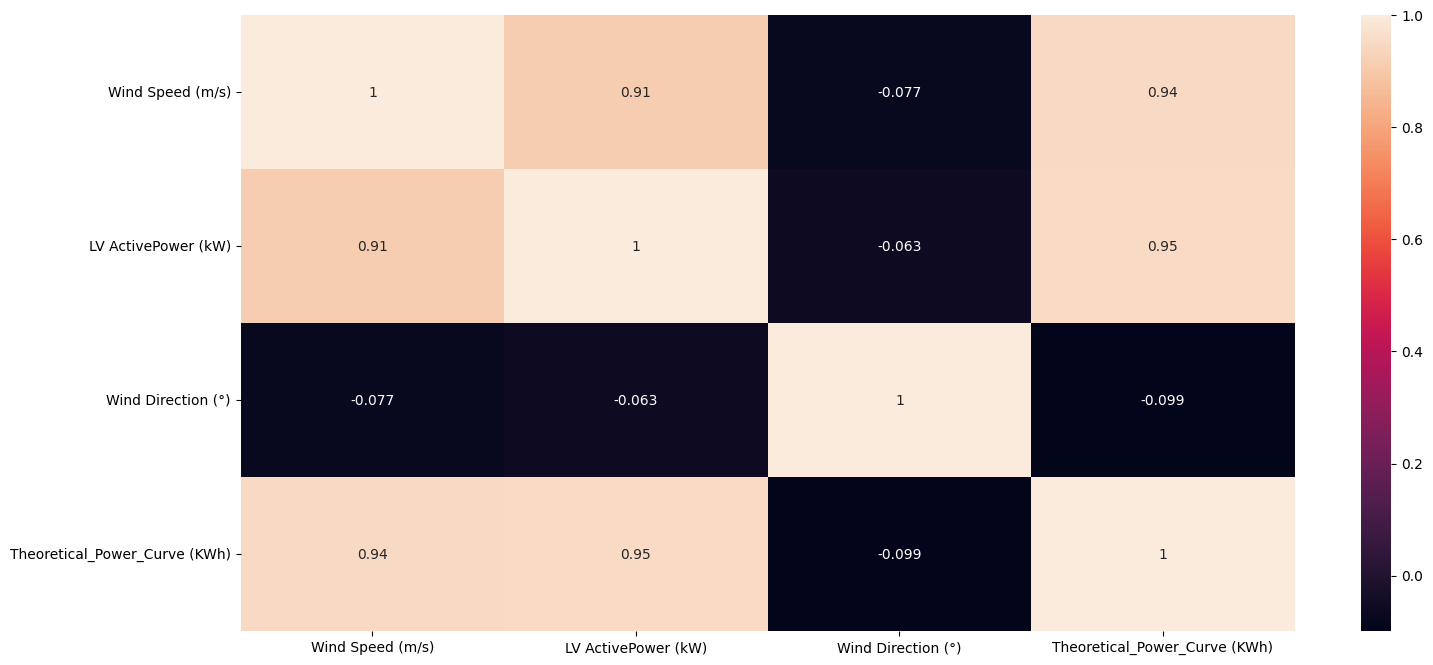

In [28]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.figure(figsize=(17, 8))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Exploratory Data Analysis.
Let's explore the data!

For the rest of the exercise we'll only be using the numerical data of the csv file.

In [29]:
## Use seaborn to create a jointplot to compare the wind speed and lv active power
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

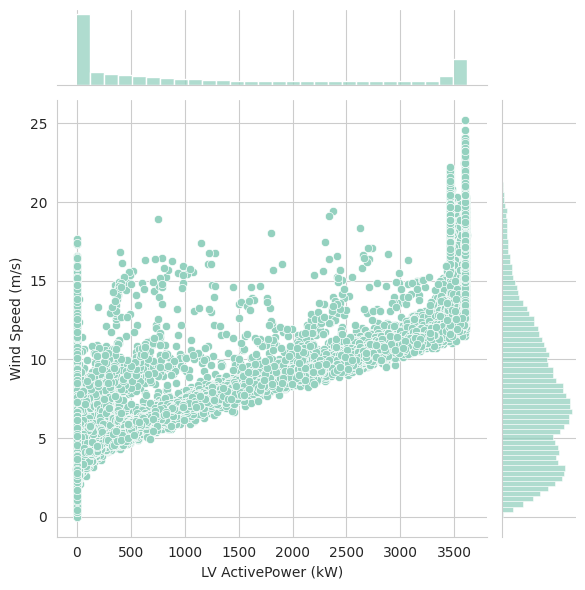

In [30]:
# More time on site, more money spent.
sns.jointplot(x='LV ActivePower (kW)',y='Wind Speed (m/s)',data=data)

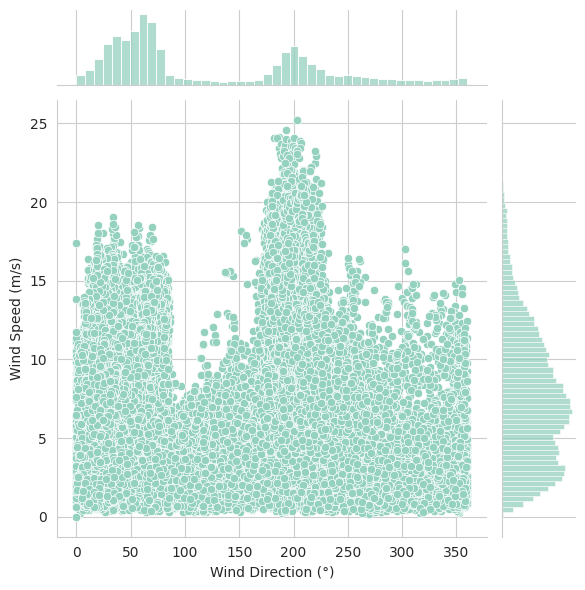

In [31]:
# do the same thing
sns.jointplot(x='Wind Direction (°)',y='Wind Speed (m/s)',data=data)

Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below

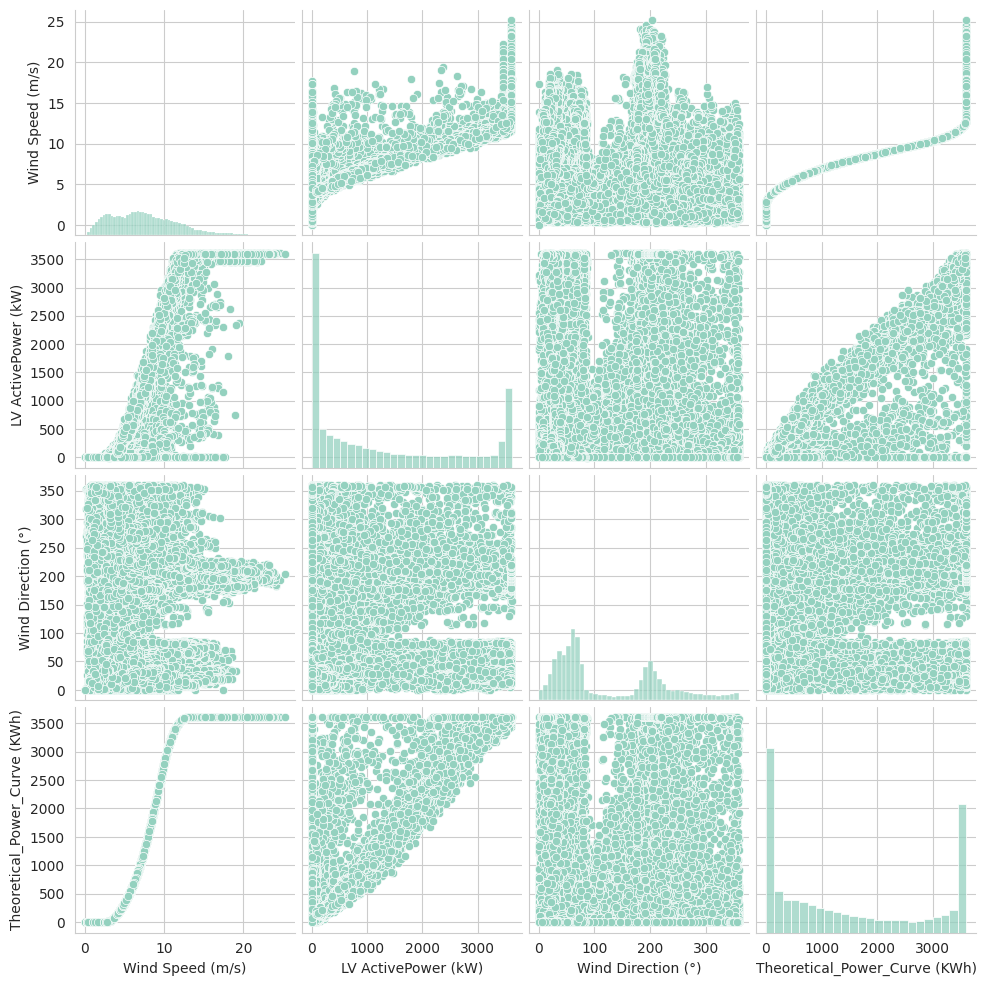

In [32]:
sns.pairplot(data)

<ipython-input-33-d18fbc1967fb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Wind Speed (m/s)"])


Text(0.5, 1.0, 'wind speed distribution')

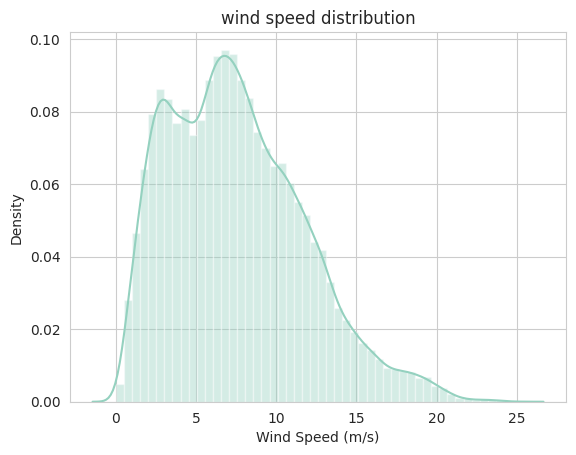

In [33]:
sns.distplot(data["Wind Speed (m/s)"])
plt.title("wind speed distribution")

In [47]:
ax = WindroseAxes.from_ax()
ax.bar(data.Wind Direction (°), data.Wind Speed (m/s), normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

SyntaxError: ignored

In [48]:
ax = WindroseAxes.from_ax()
ax.box(df.Wind Direction (°), df.Wind Speed (m/s), bins=np.arange(0, 8, 1))
ax.set_legend()

SyntaxError: ignored

Question: What is the power production for different wind directions and speeds?
Let's create a polar diagram with wind speed, wind direction and power production from the sample data.

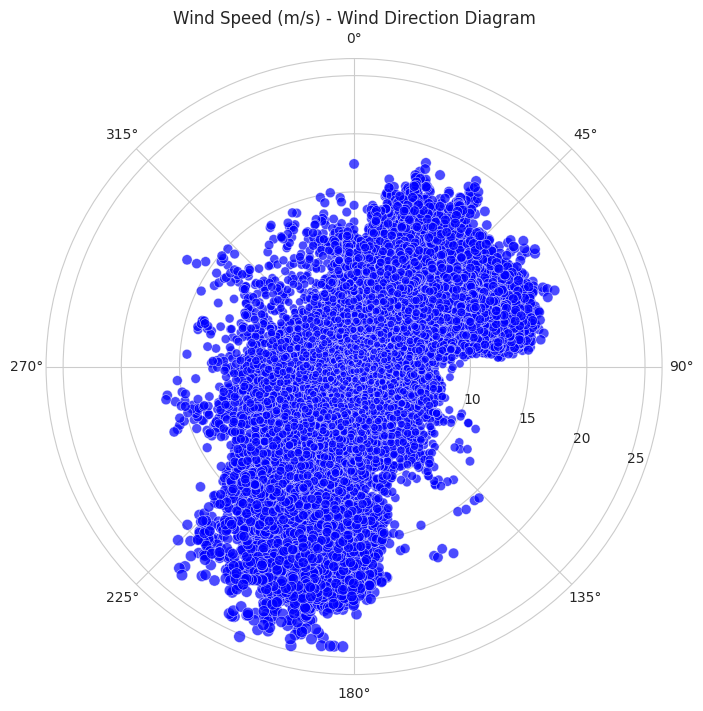

In [46]:
# Creating the polar diagram
from math import radians
sample_data=data
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True,)
# Inside circles are the wind speed and marker color and size represents the amount of power production
sns.scatterplot(x=[radians(x) for x in sample_data['Wind Direction (°)']],
                y=sample_data['Wind Speed (m/s)'],
                size=sample_data['Wind Speed (m/s)'],
                alpha=0.7, legend=None,color='blue')
# Setting the polar diagram's top represents the North
ax.set_theta_zero_location('N')
# Setting -1 to start the wind direction clockwise
ax.set_theta_direction(-1)
# Setting wind speed labels in a better position to see
ax.set_rlabel_position(110)
plt.title('Wind Speed (m/s) - Wind Direction Diagram')
plt.rcParams['savefig.dpi'] = 500
plt.savefig('polar diagram.jpg')
plt.ylabel(None);

We can see that wind speed is higher during 0-90 and 180-225 degrees.

Question: Does the manufacturer's theoritical power production curve fit well with the real production?¶

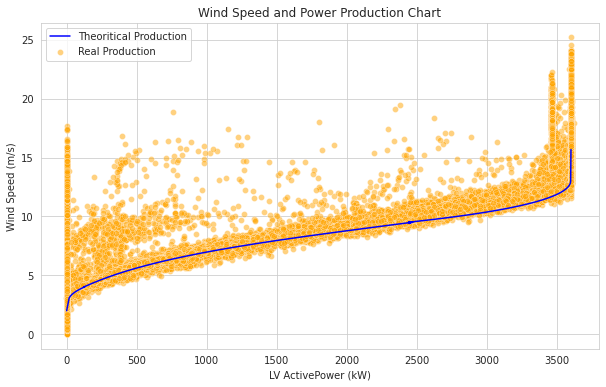

In [ ]:
plt.figure(figsize=(10,6))
sample_df=data
sns.scatterplot(x='LV ActivePower (kW)', y='Wind Speed (m/s)', color='orange', label='Real Production', alpha=0.5, data=sample_df)
sns.lineplot(x='Theoretical_Power_Curve (KWh)', y='Wind Speed (m/s)', color='blue', label='Theoritical Production', data=sample_df)
plt.title('Wind Speed and Power Production Chart')
plt.ylabel('Wind Speed (m/s)');


From the graph above, we can see the theoritical power production curve generally fits well with the real production.

We can see the wind speed reaches a maximum level and continues in a straight line if the wind power reaches to 3500 kW.

Also we can see there aren't any 0 power production.



In [ ]:
# Downloading pyspark library
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 51.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=c7393125b5d53fdae2c9d4a8e4ffc3a64583965ca0f9593dc011a5edb39cfecd
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
# Importing pyspark libraries
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

# Configuration of Spark Session
spark = SparkSession.builder.master("local").appName("wind_turbine_project").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local appName=wind_turbine_project>

In [ ]:
# Reading the dataset as Spark DataFrame
spark_df = spark.read.csv('/content/T1.csv', header=True, inferSchema=True)

# Caching the dataset
spark_df.cache()

# Converting all the column names to lower case
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

print('Show the first 5 rows')
print(spark_df.show(5))
print()
print('What are the variable data types?')
print(spark_df.printSchema())
print()
print('How many observations do we have?')
print(spark_df.count())

Show the first 5 rows
+----------------+-------------------+----------------+-----------------------------+------------------+
|       date/time|lv activepower (kw)|wind speed (m/s)|theoretical_power_curve (kwh)|wind direction (°)|
+----------------+-------------------+----------------+-----------------------------+------------------+
|01 01 2018 00:00|   380.047790527343|5.31133604049682|             416.328907824861|  259.994903564453|
|01 01 2018 00:10|    453.76919555664|5.67216682434082|             519.917511061494|   268.64111328125|
|01 01 2018 00:20|   306.376586914062|5.21603679656982|             390.900015810951|  272.564788818359|
|01 01 2018 00:30|   419.645904541015|5.65967416763305|             516.127568975674|  271.258087158203|
|01 01 2018 00:40|   380.650695800781|5.57794094085693|             491.702971953588|  265.674285888671|
+----------------+-------------------+----------------+-----------------------------+------------------+
only showing top 5 rows

None

Wh

In [ ]:
# Extracting a substring from columns to create month and hour variables

from pyspark.sql.functions import substring
spark_df = spark_df.withColumn("month", substring("date/time", 4,2))
spark_df = spark_df.withColumn("hour", substring("date/time", 12,2))

# Converting string month and hour variables to integer
from pyspark.sql.types import IntegerType
spark_df = spark_df.withColumn('month', spark_df.month.cast(IntegerType()))
spark_df = spark_df.withColumn('hour', spark_df.hour.cast(IntegerType()))

print(spark_df.show(5))

+----------------+-------------------+----------------+-----------------------------+------------------+-----+----+
|       date/time|lv activepower (kw)|wind speed (m/s)|theoretical_power_curve (kwh)|wind direction (°)|month|hour|
+----------------+-------------------+----------------+-----------------------------+------------------+-----+----+
|01 01 2018 00:00|   380.047790527343|5.31133604049682|             416.328907824861|  259.994903564453|    1|   0|
|01 01 2018 00:10|    453.76919555664|5.67216682434082|             519.917511061494|   268.64111328125|    1|   0|
|01 01 2018 00:20|   306.376586914062|5.21603679656982|             390.900015810951|  272.564788818359|    1|   0|
|01 01 2018 00:30|   419.645904541015|5.65967416763305|             516.127568975674|  271.258087158203|    1|   0|
|01 01 2018 00:40|   380.650695800781|5.57794094085693|             491.702971953588|  265.674285888671|    1|   0|
+----------------+-------------------+----------------+-----------------

Question: What are the distributions of the variables?
For creating visualization we need to either use aggregated data or use a sample from the big data.

So I will get a random sample from my big data.

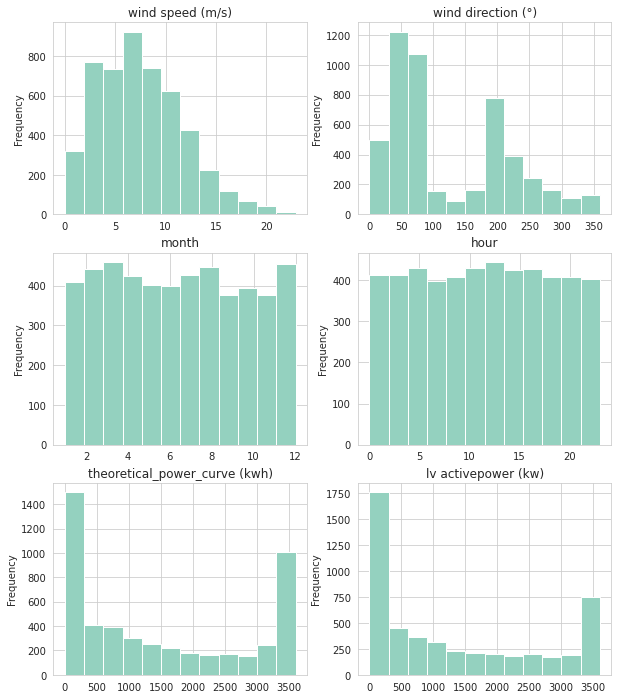

In [ ]:
# Taking a random sample from the big data
sample_df = spark_df.sample(withReplacement=False, fraction=0.1, seed=42).toPandas()

# Visualizing the distributions with the sample data
columns = ['wind speed (m/s)', 'wind direction (°)', 'month', 'hour', 'theoretical_power_curve (kwh)', 'lv activepower (kw)']
i=1
plt.figure(figsize=(10,12))
for each in columns:
    plt.subplot(3,2,i)
    sample_df[each].plot.hist(bins=12)
    plt.title(each)
    i += 1

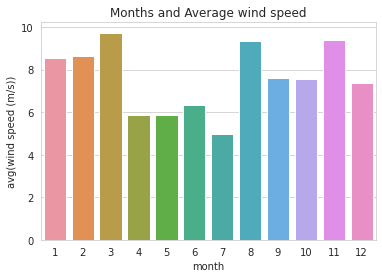

In [ ]:
# Average power production by month
monthly = spark_df.groupby('month').mean('wind speed (m/s)').sort('avg(wind speed (m/s))').toPandas()
sns.barplot(x='month', y='avg(wind speed (m/s))', data=monthly)
plt.title('Months and Average wind speed');

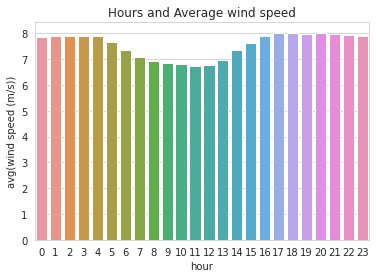

In [ ]:
# Average power production by hour
hourly = spark_df.groupby('hour').mean('wind speed (m/s)').sort('avg(wind speed (m/s))').toPandas()
sns.barplot(x='hour', y='avg(wind speed (m/s))', data=hourly)
plt.title('Hours and Average wind speed');

,wind speed (m/s),wind direction (°),month,hour,theoretical_power_curve (kwh),lv activepower (kw)
wind speed (m/s),1.000000,-0.082885,-0.008581,0.026955,0.945094,0.911477
wind direction (°),-0.082885,1.000000,-0.183446,0.002234,-0.105932,-0.064545
month,-0.008581,-0.183446,1.000000,-0.010774,-0.001126,0.035498
hour,0.026955,0.002234,-0.010774,1.000000,0.032871,0.031572
theoretical_power_curve (kwh),0.945094,-0.105932,-0.001126,0.032871,1.000000,0.943910
lv activepower (kw),0.911477,-0.064545,0.035498,0.031572,0.943910,1.000000


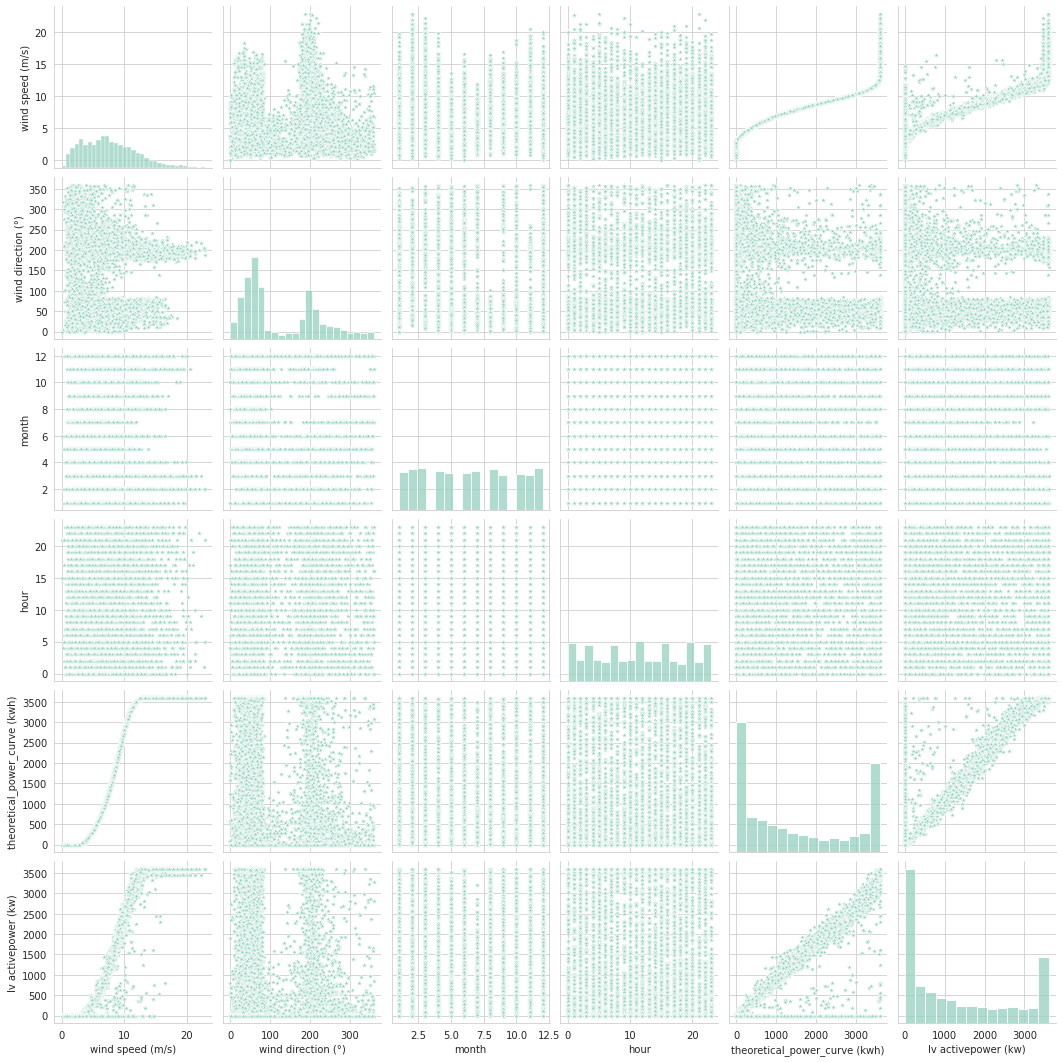

In [ ]:
#Question: Is there any correlation between the wind speed, wind direction and power production?
display(sample_df[columns].corr())
sns.pairplot(sample_df[columns], markers='*');

Wind speed and power production is highly correlated as one would expect.

We can see there are lower level power production for some wind directions.

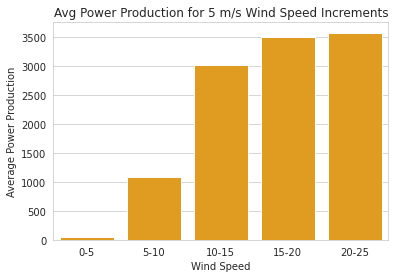

In [ ]:
#Question: What is the average power production level for different wind speeds?
# Finding average power production for 5 m/s wind speed increments
wind_speed = []
avg_power = []
for i in [0,5,10,15,20]:
    avg_value = spark_df.filter((spark_df['wind speed (m/s)'] > i)
                                & (spark_df['wind speed (m/s)'] <= i+5))\
                                .agg({'lv activepower (kw)':'mean'}).collect()[0][0]
    avg_power.append(avg_value)
    wind_speed.append(str(i) + '-' + str(i+5))

sns.barplot(x=wind_speed, y=avg_power, color='orange')
plt.title('Avg Power Production for 5 m/s Wind Speed Increments')
plt.xlabel('Wind Speed')
plt.ylabel('Average Power Production');

,wind speed (m/s),theoretical_power_curve (kwh),lv activepower (kw)
4962,1.816610,0.0,0.0
4256,2.152518,0.0,0.0
1446,2.665400,0.0,0.0
6867,1.637424,0.0,0.0
1880,2.220811,0.0,0.0


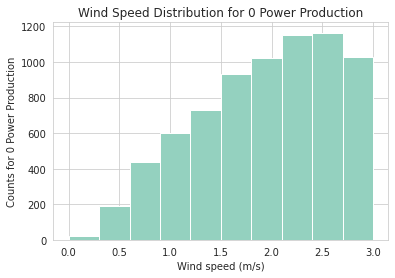

In [ ]:
#Question: What is the wind speed threshold value for zero theorical power?
# Filter the big data where the real and theoritical power productions are equal to 0
zero_theo_power = spark_df.filter((spark_df['lv activepower (kw)'] == 0)
                                  & (spark_df['theoretical_power_curve (kwh)'] == 0)).toPandas()

display(zero_theo_power[['wind speed (m/s)', 'theoretical_power_curve (kwh)', 'lv activepower (kw)']].sample(5))

# Let's see the wind speed distribution for 0 power production
zero_theo_power['wind speed (m/s)'].hist()
plt.title('Wind Speed Distribution for 0 Power Production')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Counts for 0 Power Production');

We can see from above, limit for the theoritical power curve is 3 m/s wind speed. If the wind speed is below 3 m/s model doesn't expect any power production.

But there are some observations for 0 power production even the wind speed is more than 3 m/s.

Question: Why there aren't any power production in some observations while the wind speed is higher than 3 m/s?


In [ ]:
# Observations for the wind speed > 3m/s and power production = 0,
# While theoritically there should be power production
zero_power = spark_df.filter((spark_df['lv activepower (kw)'] == 0)
                            & (spark_df['theoretical_power_curve (kwh)'] != 0)
                            & (spark_df['wind speed (m/s)'] > 3)).toPandas()
display(zero_power.head())
print('No of Observations (while Wind Speed > 3 m/s and Power Production = 0): ', len(zero_power))

,date/time,lv activepower (kw),wind speed (m/s),theoretical_power_curve (kwh),wind direction (°),month,hour
0,03 01 2018 15:40,0.0,3.743307,83.986265,245.068207,1,15
1,03 01 2018 16:40,0.0,3.034003,17.180593,221.086502,1,16
2,03 01 2018 16:50,0.0,3.197354,25.431221,232.679596,1,16
3,03 01 2018 17:00,0.0,3.907811,110.979604,241.973099,1,17
4,04 01 2018 13:50,0.0,3.441704,45.742725,79.094109,1,13


No of Observations (while Wind Speed > 3 m/s and Power Production = 0):  3497


There are 3497 observations where theoritically there should be power production. From the dataset we cannot see the reason, it might be caused by maintenance. But let's see if we can see any information from the wind speed, direction and month?

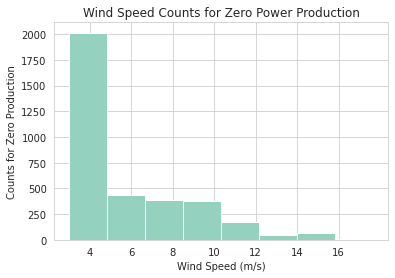

In [ ]:
zero_power['wind speed (m/s)'].plot.hist(bins=8)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Counts for Zero Production')
plt.title('Wind Speed Counts for Zero Power Production')
plt.xticks(ticks=np.arange(4,18,2));

It looks like theoritically wind speed threshold should be 4 m/s. But there are also other observations with zero power production while the wind speed is higher.



Importing data

In [ ]:
#One year data
data = pd.read_csv('/content/time.csv',encoding= 'unicode_escape',parse_dates=True,index_col='Date/Time')
data=data.drop(['Theoretical_Power_Curve (KWh)'], axis = 1)

In [ ]:
#Since Each day has 144 timestamps, 52560 entries must be present in the data
len(data)

50530

In [ ]:
## FILLING MISSING TIME STAMPS USING FORWARD AND BACKWARD FILL
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='10T'))

In [ ]:
data = data.ffill().bfill()

In [ ]:
len(data)

52560

In [ ]:
data.head()

,Wind Speed (m/s),LV ActivePower (kW),Wind Direction (°)
2018-01-01 00:00:00,5.311336,380.047791,259.994904
2018-01-01 00:10:00,5.672167,453.769196,268.641113
2018-01-01 00:20:00,5.216037,306.376587,272.564789
2018-01-01 00:30:00,5.659674,419.645904,271.258087
2018-01-01 00:40:00,5.577941,380.650696,265.674286


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Freq: 10T
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wind Speed (m/s)     52560 non-null  float64
 1   LV ActivePower (kW)  52560 non-null  float64
 2   Wind Direction (°)   52560 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [ ]:
data.describe()

,Wind Speed (m/s),LV ActivePower (kW),Wind Direction (°)
count,52560.000000,52560.000000,52560.000000
mean,7.567926,1323.673432,122.788151
std,4.214228,1324.086704,93.108944
min,0.000000,-2.471405,0.000000
25%,4.193436,47.240683,48.933632
50%,7.109335,826.241730,73.179310
75%,10.405892,2535.172424,201.582722
max,25.206011,3618.732910,359.997589


NORMALIZING THE FEATURES USING SKLEARN

In [ ]:
import os, sys
from scipy import stats
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)

In [ ]:
scaled.shape

(52560, 3)

In [ ]:
type(scaled)

numpy.ndarray

CONVERTING THE NORMALIZED NUMPY ARRAY INTO SUPERVISED LEARNING

In [ ]:
# specify the number of lag hours
#For one hour there are 6 entries.Previous 6 entries for each feature is calculated here using the function series_to_supervised
n_hours = 6
n_features = 3

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=6, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.shape

(52554, 21)

In [ ]:
reframed.head()

,var1(t-6),var2(t-6),var3(t-6),var1(t-5),var2(t-5),var3(t-5),var1(t-4),var2(t-4),var3(t-4),var1(t-3),...,var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
6,0.210717,0.105633,0.722213,0.225032,0.125991,0.746230,0.206936,0.085289,0.757129,0.224537,...,0.753500,0.221294,0.105800,0.737989,0.222330,0.111804,0.734946,0.229826,0.124289,0.739348
7,0.225032,0.125991,0.746230,0.206936,0.085289,0.757129,0.224537,0.116568,0.753500,0.221294,...,0.737989,0.222330,0.111804,0.734946,0.229826,0.124289,0.739348,0.210507,0.107620,0.716531
8,0.206936,0.085289,0.757129,0.224537,0.116568,0.753500,0.221294,0.105800,0.737989,0.222330,...,0.734946,0.229826,0.124289,0.739348,0.210507,0.107620,0.716531,0.221559,0.128720,0.704118
9,0.224537,0.116568,0.753500,0.221294,0.105800,0.737989,0.222330,0.111804,0.734946,0.229826,...,0.739348,0.210507,0.107620,0.716531,0.221559,0.128720,0.704118,0.219123,0.122113,0.718682
10,0.221294,0.105800,0.737989,0.222330,0.111804,0.734946,0.229826,0.124289,0.739348,0.210507,...,0.716531,0.221559,0.128720,0.704118,0.219123,0.122113,0.718682,0.227093,0.138256,0.699591


SPLITTING INTO TRAIN DATA AND TEST DATA

In [ ]:
# split into train and test sets
values = reframed.values
n_train_time = 34992
train = values[:n_train_time, :]
test = values[n_train_time:, :]

In [ ]:
test.shape,train.shape

((17562, 21), (34992, 21))

In [ ]:
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [ ]:
train_X.shape, len(train_X), train_y.shape,test_X.shape,test_y.shape

((34992, 18), 34992, (34992,), (17562, 18), (17562,))

RESAMPLING THE INPUTS INTO 3-DIMENSION

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

In [ ]:
train_X.shape, train_y.shape, test_X.shape,test_y.shape

((34992, 6, 3), (34992,), (17562, 6, 3), (17562,))

# Training the ANN model for train data set

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
np.random.seed(0)

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


#Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
from keras.models import load_model
from keras.layers import Lambda
import tensorflow as tf
opt = Adam(learning_rate=0.00009)
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Train the ANN
import tensorflow as tf
from sklearn.model_selection import train_test_split

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.BatchNormalization(axis=-1),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.BatchNormalization(axis=-1),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.BatchNormalization() ,
  tf.keras.layers.Dropout(rate=0.5),

  tf.keras.layers.Dense(3,activation='softmax')

])

learning_rate = 0.001
epochs=2
opt= tf.keras.optimizers.Adam(learning_rate=learning_rate , decay=learning_rate/(epochs*0.5))
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


aug = tf.keras.preprocessing.image.ImageDataGenerator(
          rotation_range=10,
          zoom_range=0.15,
          width_shift_range=0.1,
          height_shift_range=0.1,
          shear_range=0.15,
          horizontal_flip= False,
          vertical_flip= False,
          fill_mode="nearest"
          )


train_X = tf.random.normal((50, 256, 256, 3))
train_y = tf.random.uniform((50, ), maxval=3, dtype=tf.int32)
history = model.fit(train_X, train_y, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2/2 [==============================] - 22s 8s/step - loss: 2.4676 - accuracy: 0.2500 - val_loss: 7.9073 - val_accuracy: 0.4000
Epoch 2/150
2/2 [==============================] - 18s 5s/step - loss: 0.0747 - accuracy: 0.9750 - val_loss: 1.6425 - val_accuracy: 0.4000
Epoch 3/150
2/2 [==============================] - 18s 5s/step - loss: 0.0502 - accuracy: 0.9750 - val_loss: 1.2700 - val_accuracy: 0.4000
Epoch 4/150
2/2 [==============================] - 17s 5s/step - loss: 0.0960 - accuracy: 0.9500 - val_loss: 1.1328 - val_accuracy: 0.4000
Epoch 5/150
2/2 [==============================] - 17s 5s/step - loss: 0.1142 - accuracy: 0.9500 - val_loss: 1.1127 - val_accuracy: 0.4000
Epoch 6/150
2/2 [==============================] - 16s 5s/step - loss: 0.0947 - accuracy: 0.9500 - val_loss: 1.1135 - val_accuracy: 0.4000
Epoch 7/150
2/2 [==============================] - 17s 5s/step - loss: 0.0678 - accuracy: 0.9750 - val_loss: 1.0920 - val_accuracy: 0.4000
Epoch 8/150
2/2 [==========

In [ ]:
# model evaluation
from keras.models import load_model
scores = model.evaluate(test_X, test_y)
ANN_accuracy = scores[1]*100
print('Test accuracy: ', scores[1]*100, '%')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=20,7

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [ ]:
model.build(input_shape=(256, 256, 3))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


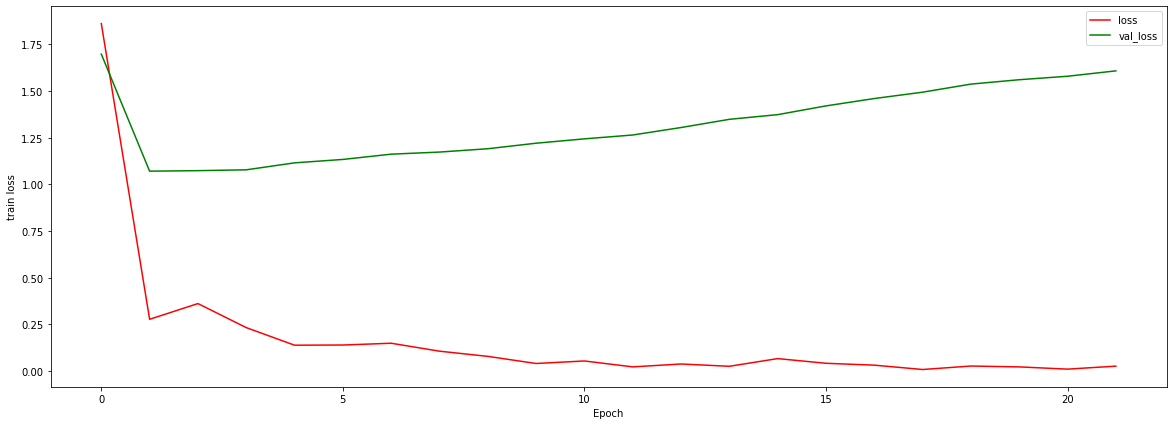

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='loss',color='red')
pyplot.plot(history.history['val_loss'], label='val_loss',color='green')
plt.xlabel("Epoch")
plt.ylabel("train loss")
pyplot.legend(loc="best")
pyplot.show()

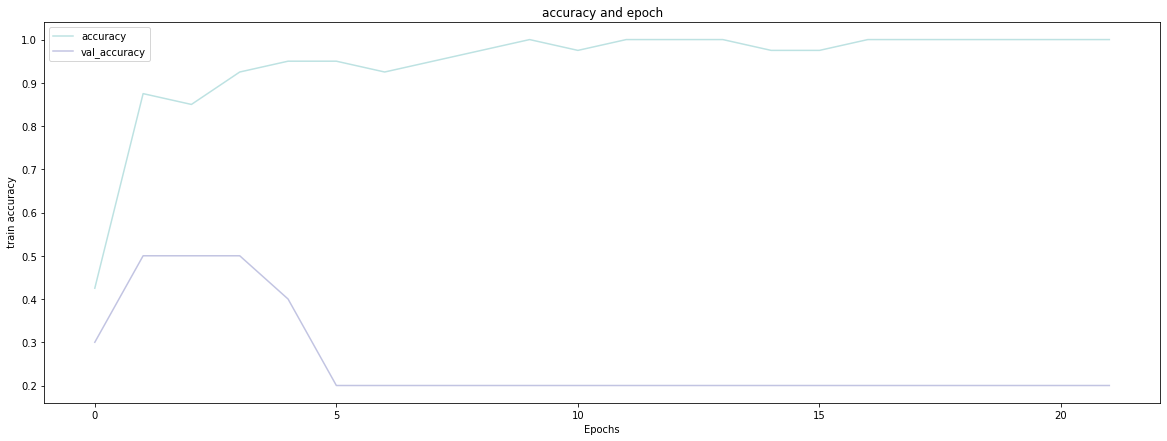

In [ ]:
history_data = pd.DataFrame(history.history)

plt.plot(history_data.loc[:, ['accuracy']], "#BDE2E2", label='accuracy')
plt.plot(history_data.loc[:, ['val_accuracy']], "#C2C4E2", label='val_accuracy')
plt.title('accuracy and epoch')
plt.xlabel('Epochs')
plt.ylabel(' train accuracy')
plt.legend()
plt.show()

In [ ]:
# make a prediction
pred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

# #INVERSING THE SCALING AND NORMALIZATION USING SKLEARN

In [ ]:
# invert scaling for forecast
inv_pred = concatenate((pred, test_X[:, -2:]), axis=1)
inv_pred = scaler.inverse_transform(inv_pred)
inv_pred = inv_pred[:,0]

In [ ]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -2:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
inv_y = inv_y[:-1]
inv_pred = inv_pred[1:]

#CREATING A DATA FRAME WITH ACTUAL AND PREDICTED VALUES

In [ ]:
#rmse = sqrt(mean_squared_error(inv_y[:-1,], inv_yhat[1:,]))
#print('Test RMSE: %.3f' % rmse)

In [ ]:
c=pd.date_range('9/1/2018 01:00:00',periods=17562,freq='10T')
c=pd.DataFrame(c,columns=['index'])
actual_data=pd.DataFrame(inv_y,columns=['actual'])
pred_data=pd.DataFrame(inv_pred,columns=['pred'])
c['actual']=actual_data['actual']
c['pred']=pred_data['pred']

In [ ]:
c=c.set_index('index')
c = c.ffill().bfill()

#CALCULATING RMSE AND MAE

In [ ]:
import math
train_score = model.evaluate(train_X, train_y, verbose=0)
print('Train RMSE:{:.2f} '.format(math.sqrt(train_score)))

In [ ]:
# calculate RMSE
mse = mean_squared_error(inv_y, inv_pred)
rmse = sqrt(mean_squared_error(inv_y, inv_pred))
print('Test RMSE: %.3f' % rmse)
print('Test MSE: %.3f' % mse)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(inv_y,inv_pred)
rmae=sqrt(mean_absolute_error(inv_y,inv_pred))
print('Test MAE: %.3f' % mae)
print('Test RMAE: %.3f' % rmae)

## ann model for test data set

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
np.random.seed(0)

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


#Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
from keras.models import load_model
from keras.layers import Lambda
import tensorflow as tf
opt = Adam(learning_rate=0.00009)
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Train the ANN
import tensorflow as tf
from sklearn.model_selection import train_test_split

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.BatchNormalization(axis=-1),

  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.BatchNormalization(axis=-1),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.BatchNormalization() ,
  tf.keras.layers.Dropout(rate=0.5),

  tf.keras.layers.Dense(3,activation='softmax')

])

learning_rate = 0.001
epochs=2
opt= tf.keras.optimizers.Adam(learning_rate=learning_rate , decay=learning_rate/(epochs*0.5))
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


aug = tf.keras.preprocessing.image.ImageDataGenerator(
          rotation_range=10,
          zoom_range=0.15,
          width_shift_range=0.1,
          height_shift_range=0.1,
          shear_range=0.15,
          horizontal_flip= False,
          vertical_flip= False,
          fill_mode="nearest"
          )


test_X = tf.random.normal((50, 256, 256, 3))
test_y = tf.random.uniform((50, ), maxval=3, dtype=tf.int32)
history = model.fit(test_X, test_y, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2/2 [==============================] - 27s 7s/step - loss: 1.8610 - accuracy: 0.4250 - val_loss: 1.6974 - val_accuracy: 0.3000
Epoch 2/150
2/2 [==============================] - 22s 5s/step - loss: 0.2773 - accuracy: 0.8750 - val_loss: 1.0705 - val_accuracy: 0.5000
Epoch 3/150
2/2 [==============================] - 18s 6s/step - loss: 0.3614 - accuracy: 0.8500 - val_loss: 1.0733 - val_accuracy: 0.5000
Epoch 4/150
2/2 [==============================] - 17s 6s/step - loss: 0.2327 - accuracy: 0.9250 - val_loss: 1.0777 - val_accuracy: 0.5000
Epoch 5/150
2/2 [==============================] - 17s 5s/step - loss: 0.1385 - accuracy: 0.9500 - val_loss: 1.1151 - val_accuracy: 0.4000
Epoch 6/150
2/2 [==============================] - 21s 7s/step - loss: 0.1394 - accuracy: 0.9500 - val_loss: 1.1334 - val_accuracy: 0.2000
Epoch 7/150
2/2 [==============================] - 17s 5s/step - loss: 0.1489 - accuracy: 0.9250 - val_loss: 1.1616 - val_accuracy: 0.2000
Epoch 8/150
2/2 [==========

Making prediction

In [ ]:
model.summary()